This tutorial I learn how to descrbe bacteria growth mathematically and then analyze images to determine the growth rate of a bacteria colony.

### <font color = 'grey'> Describing bacterial growth mathematically </font>

Bacteria will grow exponentially with nutrient-rich environment.
Let's assume the growth rate is $ \lambda $. If $ N(t) $ is the number of bacteria at time t, after a time step $ \Delta t $, the number of bacteria will be
$$ N(t + \Delta t) = N(t) + \lambda N(t) \Delta t$$

Taking the $ \Delta t \rightarrow 0 $ limit, we have the time evolution equation for N(t)
$$ \frac{N(t + \Delta t) - N(t)}{ \Delta t} \approx \frac{dN(t)}{dt} = \lambda N(t)$$

The initial bacteria number is $ N_0 $, the solution of the above ODE is $$ N(t) = N_0e^{\lambda t}$$

We are also interested in the doubling time of bacteria $ \tau $, which is the time it takes a bacterium to multiply.
$$ N(t + \tau) = 2N(t) $$

Plug in solution into this equation, we have

$$ N_0e^{\lambda (t+ \tau)} = 2N_0e^{\lambda t} $$

$$ e^{\lambda \tau} = 2$$

 so we have $$ \tau = \frac {ln(2)}{\lambda} $$

So now we know how bacteria grow, we can analyze microscopy images of a bacteria colony over time to estimate the growth rate $ \lambda $ and the doubling time $ \tau $.

## <font color = 'grey'> Analyzing images of bacteria colony </font>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# To make plots pretty
import seaborn as sns
rc = {'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize':14, 'ytick.labelsize':14}

In [46]:
# For bulk qcuisition of filenames
import glob

In [47]:
# For importing bacteria images
import skimage.io

Let's start to estimate the rate of bacteria growth using the microscopy images.
There are two types of images, first taken with phase contrast method named ecoli_phase_xx.tif, the other were taken with fluorescence methods and named ecoli_TRITC_xx.tif.

Firstly, look at one of the fluorescence images.

In [5]:
# Read an example phase contrast image
im = skimage.io.imread('./data/ecoli_growth/ecoli_TRITC_05.tif')

In [48]:
# Take a look at its contents
im

array([[206, 206, 205, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 205],
       ...,
       [206, 206, 206, ..., 203, 204, 204],
       [205, 205, 205, ..., 203, 204, 204],
       [205, 205, 205, ..., 203, 205, 205]], dtype=uint16)

What we see is the image is an array of integers. Each pixel is assigne with a numerial value to describe the intensity in a 2D array. Larger value corresponds to brighter pixels.

We can see the image rather than the numerical values by plot.imshow() on our image

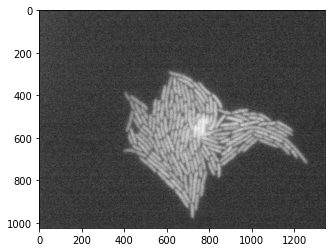

In [49]:
# show the image in greyscale colormap
plt.imshow(im, cmap = plt.cm.Greys_r)

# remove the grid that is shown by default
plt.grid(False)

We can easily distinguish the colony from the background. But how can we make the computer do the same?
In order to compare the contents of different images, we need to re-normalize the numerical values of pixels to be from 0 to 1, where 0 corresponds to the darkest pixel and 1 to the lightest.

In [50]:
# Renormalize the pixel values to the [0, 1] range
im_float = (im - np.min(im)) / (np.max(im) - np.min(im))

# show the contents again
im_float

array([[0.27272727, 0.27272727, 0.22727273, ..., 0.18181818, 0.18181818,
        0.18181818],
       [0.18181818, 0.18181818, 0.18181818, ..., 0.18181818, 0.18181818,
        0.18181818],
       [0.18181818, 0.18181818, 0.18181818, ..., 0.18181818, 0.18181818,
        0.22727273],
       ...,
       [0.27272727, 0.27272727, 0.27272727, ..., 0.13636364, 0.18181818,
        0.18181818],
       [0.22727273, 0.22727273, 0.22727273, ..., 0.13636364, 0.18181818,
        0.18181818],
       [0.22727273, 0.22727273, 0.22727273, ..., 0.13636364, 0.22727273,
        0.22727273]])

### Note the method to normalize values to 0 and 1: by $ \frac{im - min(im)}{max-min}$

Let's hover over the pixels and have a sense of what values the background the bacteria pixels have.

<IPython.core.display.Javascript object>


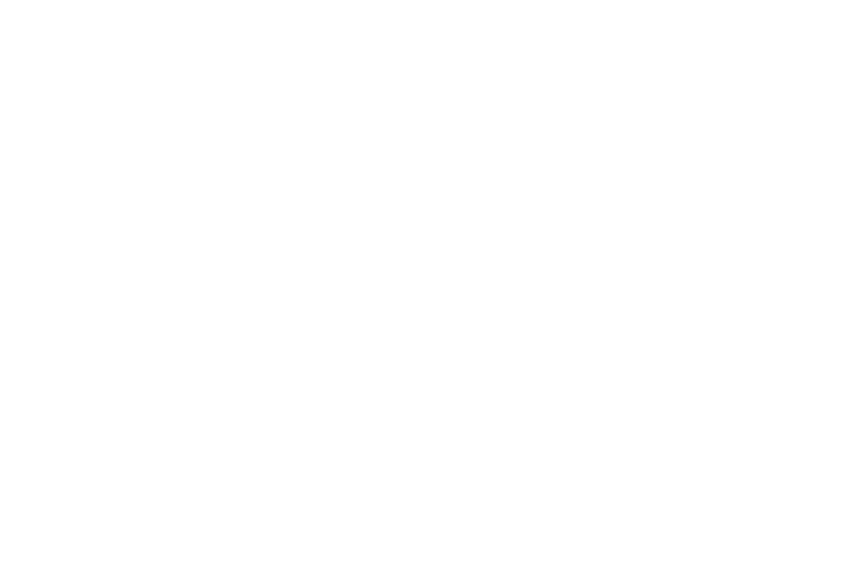

<IPython.core.display.Javascript object>


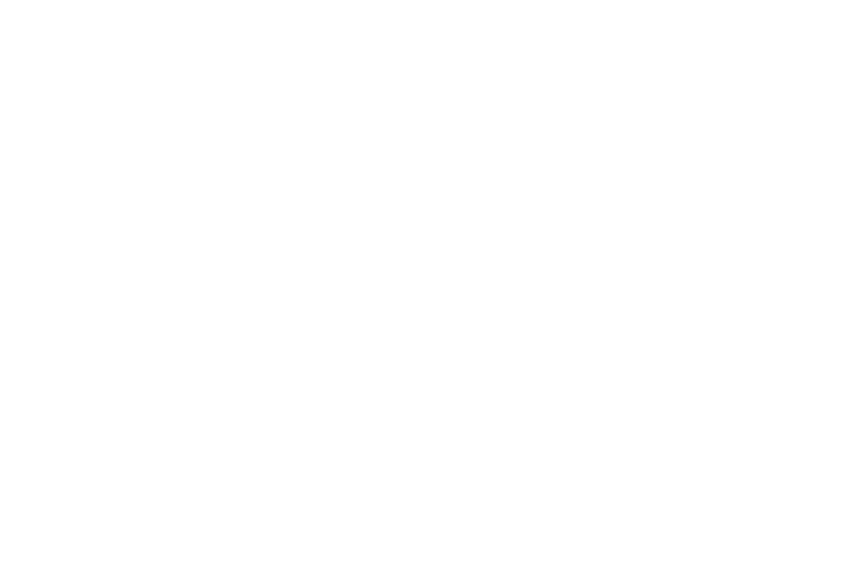

In [51]:
%matplotlib notebook

plt.imshow(im_float, cmap=plt.cm.Greys_r)
plt.grid(False)

It seems that the background have pixel values around 0.2, the bacteria cells have higher values 0.6 - 0.8.
So if we want to let computer to distinguish between bacteria and background, which is called the segmenting the image process, we should set a threshold to let all pixels above this threshold to be 1 (corresponding to bacteria) and all pixels below this threshold to be 0 (corresponding to background). This threshold need to be set by researcher after checking the image pixel value. Here we set threshold as 0.4 according to the image value.

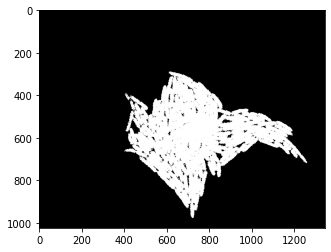

In [52]:
# Now we start to do segmentation.
%matplotlib inline

# set the threshold value 
threshold = 0.4
# apply the threshold and show the segmented image
plt.imshow(im_float > threshold, cmap = plt.cm.Greys_r)
plt.grid(False)

Compare with the real image and we find the segmentation is pretty well done. 
But this image is just 1 frame of the experiment, we need to use the same procedure for an image at later frame to make sure our threshold value work well for multiple images.

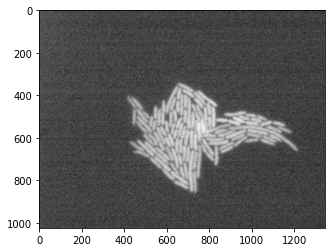

In [53]:
# load a late image. If threshold also works for this late image, it more likely to work for all
im = skimage.io.imread('./data/ecoli_growth/ecoli_TRITC_18.tif')

# show the image
plt.imshow(im, cmap = plt.cm.Greys_r)
plt.grid(False)

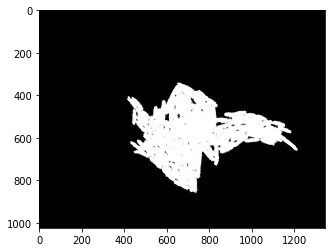

In [54]:
# Re-normalize the image
im_float = (im - np.min(im))/(np.max(im) - np.min(im))

# Apply the threshold and show the segmented image
plt.imshow(im_float > threshold, cmap = plt.cm.Greys_r)
plt.grid(False)

Now we  want to apply this to all images.
To do this, we will be using the glob.glob() function, which will grab all images with same given name.

In [55]:
# Extract the names of all phase images, make it an array.
im_names = np.sort(glob.glob('./data/ecoli_growth/ecoli_TRITC_*.tif'))

# Take a look at some
im_names[0:5]

array(['./data/ecoli_growth/ecoli_TRITC_00.tif',
       './data/ecoli_growth/ecoli_TRITC_01.tif',
       './data/ecoli_growth/ecoli_TRITC_02.tif',
       './data/ecoli_growth/ecoli_TRITC_03.tif',
       './data/ecoli_growth/ecoli_TRITC_04.tif'], dtype='<U38')

We don't know how many frames we have in total. Check it by checking the number of frames of the array I have just generated im_names

In [56]:
n_frames = len(im_names)

In [57]:
# Build an zero array to store the bacteria areas
area_total = np.zeros(n_frames)

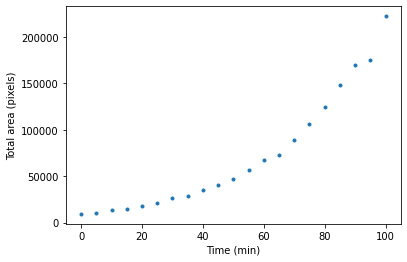

In [60]:

# segment each frame and store points above threshold and sum up as areas to store in the array above
for n in range(n_frames):
    
    # Read one frame
    im = skimage.io.imread(im_names[n])
    
    # Renormalize the image
    im_float = (im - np.min(im))/(np.max(im) - np.min(im))
    
    # Apply the threshold
    im_threshold = im_float > threshold
    
    # Sum up points over threshold and sum up as area and store in the array
    area_total[n] = np.sum(im_threshold)
    
# Set time resolution in minutes
dt = 5

# Time of all measurements
times = dt * np.arange(n_frames)

# plot out the relationship of bacteria colony area over time.
plt.plot(times, area_total, '.')
plt.xlabel('Time (min)')
plt.ylabel('Total area (pixels)')
plt.show()

This plot looks like an exponential growth. 
As what we care is the growth rate $ \lambda $, in order to better use the fititng error function below, we can rescale the areas so that the area of the first frame is re-normalized to 1.

In [64]:
# Area re-normalization
area_total_norm = area_total / area_total[0]

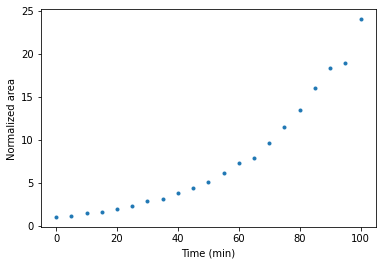

In [65]:
# plot the normalized area
plt.plot(times, area_total_norm, '.')
plt.xlabel('Time (min)')
plt.ylabel('Normalized area')
plt.show()

In order to find the growth rate $ \lambda $, by which we can best describe the curve.
To this end, we need to introduce a fitting error function defined as:
$$ Err(\lambda) = \sum \limits_{\substack{i=1}}^N (fi - f\hat{i}(\lambda))^2 $$  

where the iteration takes place over each frame. $fi$ represents the normalized area at the $ i^{th} $ frame. $ f\hat{i} (\lambda) = exp (\lambda t_i) $ is the theoretical prediction of the fractional growth for a given value of the growth rate. 

Let's write a function that evaluates the error for a given choice of $\lambda$

In [68]:
def err(norm_area, times, rate):
    """
    returns the sum of the erros for generated data (norm_area) versus the theory curve (with a given rate).
    
    """
    
    theory = np.exp(rate*times)
    
    return np.sum((theory - norm_area)**2)

To determine the growth rate of the bacteria colony, we should choose the value of $ \lambda $ that minimizes the fitting error. Let's plot the error for different values of $ \lambda $ and identify the optimal value.

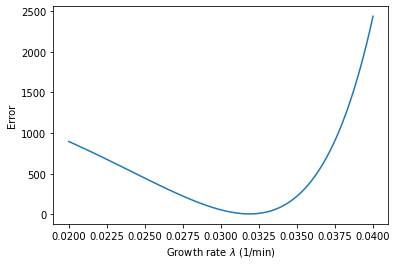

In [71]:
# number of points to plot
n_points = 100

# range of lambdas to test
lambdas = np.linspace(0.02, 0.04, n_points)

# Initilize an array of error
errors = np.zeros(n_points)

# For each lambda, call our err function to determine the amount of error
for i in range(n_points):
    errors[i] = err(area_total_norm, times, lambdas[i])
    
# plot the errors over the values of lambda
plt.plot(lambdas, errors)
plt.ylabel('Error')
plt.xlabel('Growth rate $ \lambda $ (1/min)')
plt.show()



From this plot, we find that the minimum error occurs between $\lambda =0.03$ and $\lambda = 0.04 $. The minimum seem to be around 0.032, but we can find the exact value by following method. 

In [72]:
# find the index of the optimal lambda which gives out the minimum error.
ind_optimal = np.where(errors == np.min(errors))

# extract value of the optimal lambda
lambda_fit = lambdas[ind_optimal]

# show the optimal fit
print(lambda_fit)

[0.03191919]


Now we know the optimal $\lambda \approx 0.03 min^{-1} $. It corresponds to a doubling time of $ \tau \approx 23$ minutes, which is consistent with waht we see with E.coli grown in the lab. Note: $ \tau = \frac{ln2}{\lambda}$.

The last step, we want to compare the best simulated growth curve on top of the experimental curve to visually see the goodness of fit.

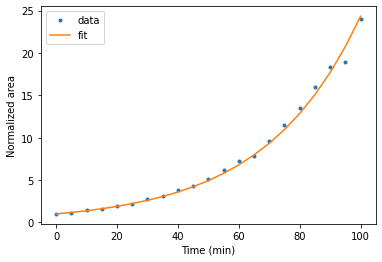

In [73]:
# plot the normalized area
plt.plot(times, area_total_norm, '.')
plt.plot(times, np.exp(lambda_fit*times))
plt.xlabel('Time (min)')
plt.ylabel('Normalized area')
plt.legend(['data', 'fit']) # legend is labeled based on occurance order.
plt.show()

